This is my helloworld with PyTorch, my first NN using this library.

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
%matplotlib inline




In [0]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

dataset['species'] = pd.Categorical(dataset['species']).codes

dataset = dataset.sample(frac=1, random_state=1234)

train_input = dataset.values[:120, :4]
train_target = dataset.values[:120, 4]

test_input = dataset.values[120:, :4]
test_target = dataset.values[120:, 4]

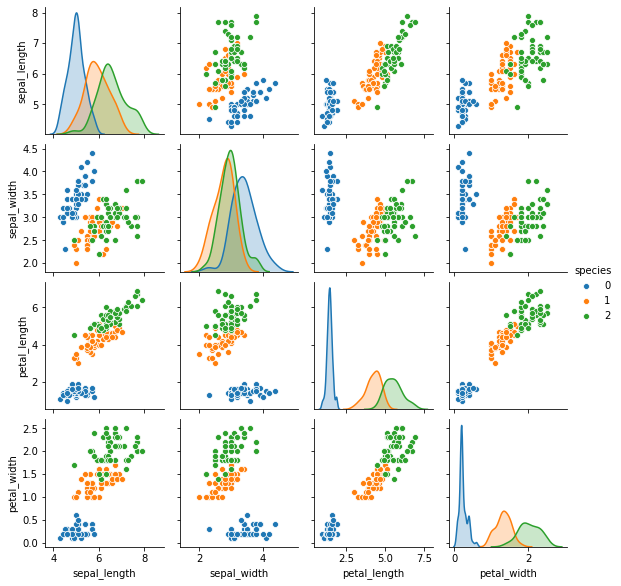

In [44]:
sns.pairplot(dataset, hue='species', height=2, aspect=1)


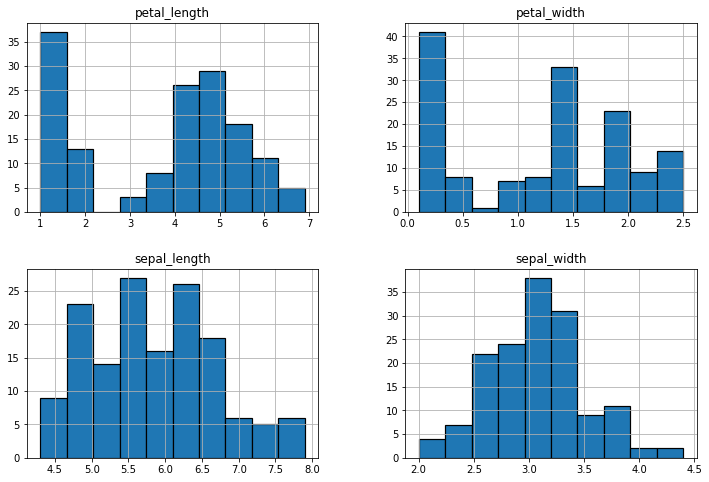

In [45]:
dataset.drop(['species'], axis=1).hist(edgecolor='black', linewidth=1.2, figsize=(12,8))
plt.show()

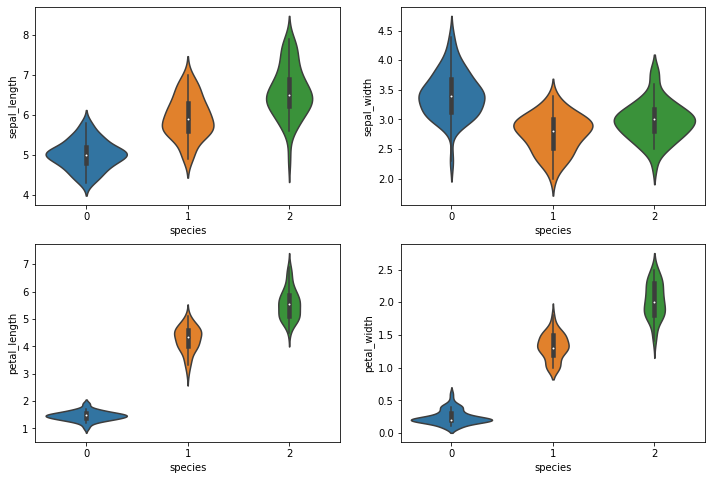

In [46]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length', data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=dataset)

In [0]:
torch.manual_seed(1234)

hidden_units = 5

net = torch.nn.Sequential(
    torch.nn.Linear(4, hidden_units),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_units, 3)
)

# choose optimizer and loss function
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)


In [48]:
epochs = 50

for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(train_input).float())
    targets = torch.autograd.Variable(torch.Tensor(train_target).long())

    optimizer.zero_grad()
    out = net(inputs)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()

    if epoch == 0 or (epoch + 1) % 10 == 0:
        print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))

Epoch 1 Loss: 1.2181
Epoch 10 Loss: 0.6745
Epoch 20 Loss: 0.2447
Epoch 30 Loss: 0.1397
Epoch 40 Loss: 0.1001
Epoch 50 Loss: 0.0855


In [49]:
import numpy as np

inputs = torch.autograd.Variable(torch.Tensor(test_input).float())
targets = torch.autograd.Variable(torch.Tensor(test_target).long())

optimizer.zero_grad()
out = net(inputs)
_, predicted = torch.max(out.data, 1)

error_count = test_target.size - np.count_nonzero((targets == predicted).numpy())
print('Errors: %d; Accuracy: %d%%' % (error_count, 100 * torch.sum(targets == predicted) / test_target.size))

Errors: 0; Accuracy: 100%
